# TP Decision Tree : Prédiction d'approbation de prêt
### Nettoyage et Preparation de Donnees + Decision Tree

[FR]
### Énoncé du problème :

__À propos de la société__ <br>
La société "Dream Housing Finance" s'occupe de tous les prêts immobiliers. Ils sont présents dans toutes les zones urbaines, semi-urbaines et rurales. Le client demande d'abord un prêt immobilier, ensuite cette société valide l'éligibilité du client au prêt.

__Problème__ <br>
La société souhaite automatiser le processus d'éligibilité au prêt (en temps réel) en fonction des détails du client fournis lors du remplissage du formulaire de demande en ligne. Ces détails sont le sexe, l'état civil, l'éducation, le nombre de personnes à charge, le revenu, le montant du prêt, les antécédents de crédit et autres. Pour automatiser ce processus, ils se sont donné comme problème d'identifier les segments de clientèle, ceux qui sont éligibles au montant du prêt afin qu'ils puissent cibler spécifiquement ces clients. Ici, ils ont fourni un ensemble de données partiel.


[EN]
### Problem Statement:

__About Company__ <br>
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

__Problem__ <br>
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.



#### Dataset Description:

| Variable | Description | 
|------|------|
| Loan_ID | Unique Loan ID | 
| Gender | Male/ Female | 
| Married | Applicant married (Y/N) | 
| Dependents | Number of dependents | 
| Education | Applicant Education (Graduate/ Under Graduate) | 
| Self_Employed | Self employed (Y/N) | 
| ApplicantIncome | Applicant income | 
| CoapplicantIncome | Coapplicant income | 
| LoanAmount | Loan amount in thousands | 
| Loan_Amount_Term | Term of loan in months | 
| Credit_History | credit history meets guidelines | 
| Property_Area | Urban/ Semi Urban/ Rural | 
| Loan_Status | Loan approved (Y/N) | 


## Read Dataset

In [1]:
################### Importing Libraries ######################
import pandas as pd

df = pd.read_csv('Training Dataset.csv')

## Preprocessing Data:
Input data needs to be pre-processed before we feed it to model.

## Data inspection and exploration

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [2]:
df.drop(columns = ['Loan_ID'], inplace= True)

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [283]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [4]:
############ Identify Categorical Columns ######################
#cat_col
cat_col = [col for col in df.columns if df[col].dtype=='object']
cat_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [5]:
############ Identify Numerical Columns ######################
#num_col
num_col = [col for col in df.columns if df[col].dtype!='object']
num_col

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

##### Observations:
1. We can see there are total 13 columns including target variable, all of them are self explanatory. 
2. We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns 


## Removal of unwanted observations

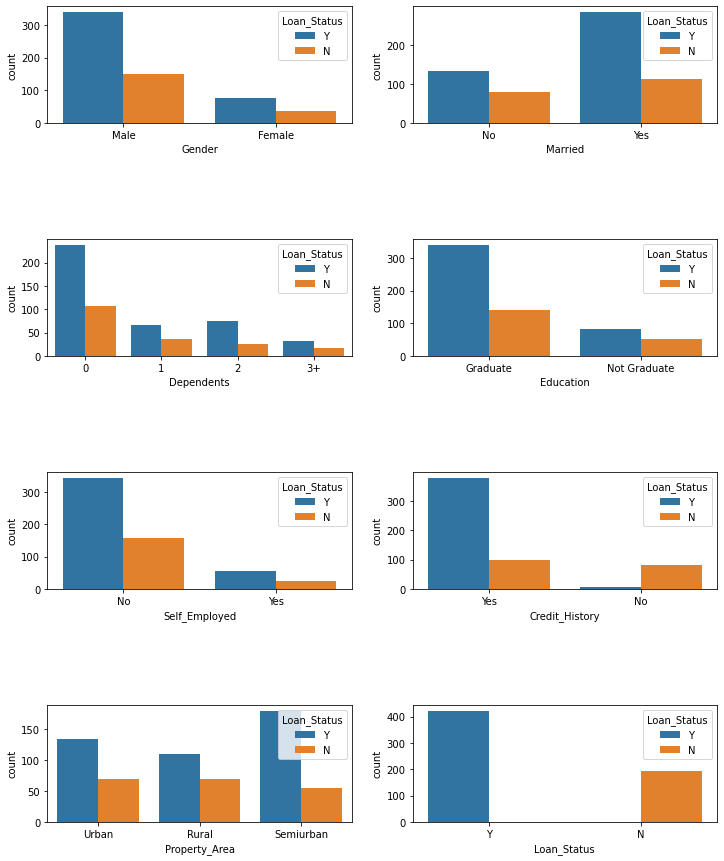

In [7]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(cat_col):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

#### Plots above convey following things about the dataset:
1. Loan Approval Status: About 2/3rd of applicants have been granted loan.
2. Sex: There are more Men  than Women (approx. 3x) 
3. Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
4. Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
5. Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
6. Employment: 5/6th of population is not self employed.
7. Property Area: More applicants from Semi-urban and also likely to be granted loans.
8. Applicant with credit history are far more likely to be accepted.
9. Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

Now, let's also analyze Numerical Columns:

## Handling missing values

In [288]:
df.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [289]:
#check percentage of null values
round((df.isnull().sum()/df.shape[0])*100,2)

Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [290]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [291]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [292]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [293]:
df['Credit_History'].value_counts()

Yes    475
No      89
Name: Credit_History, dtype: int64

In [294]:
df[cat_col].mode()

0    2500
dtype: int64

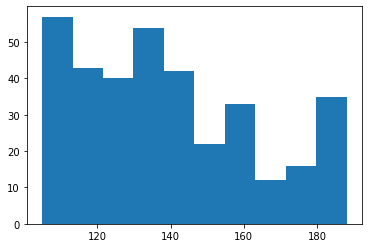

In [295]:
import matplotlib.pyplot as plt
plt.hist(df1['LoanAmount'])
plt.show()

In [304]:
cat_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [306]:
#replace the missing values in the categorical features by the mode 
#df1[cat_col] = 
for col in cat_col:
    df[col].fillna(df[col].mode()[0],inplace = True)

#replace the missing values in the numerical features by the mean 
for col in num_col:
    df[col].fillna(df[col].mean(),inplace = True)


In [308]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
imp= imp.fit(df1[cat_col])
df1[cat_col]= imp.transform(df1[cat_col])


In [71]:
imp2 = SimpleImputer(strategy='mean')
imp2 = imp.fit(df1[num_col])
df1[num_col]= imp2.transform(df1[num_col])

In [309]:
df.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

### Handling outliers

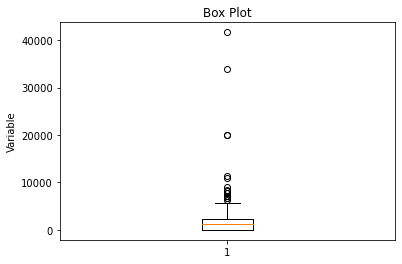

In [310]:
plt.boxplot(df['CoapplicantIncome'], vert=True)
plt.ylabel('Variable')
#plt.xlabel('Age')
plt.title('Box Plot')
#plt.xticks(range(1,5),num_col,rotation =45)#length(num_col)
plt.show()

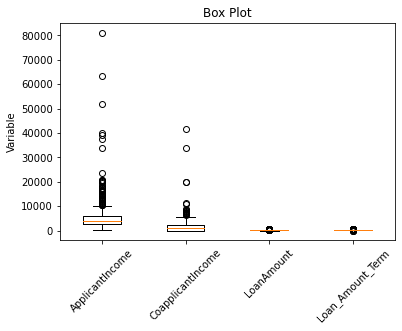

In [311]:
plt.boxplot(df[num_col], vert=True)
plt.ylabel('Variable')
#plt.xlabel('Age')
plt.title('Box Plot')
plt.xticks(range(1,5),num_col,rotation =45)#length(num_col)
plt.show()


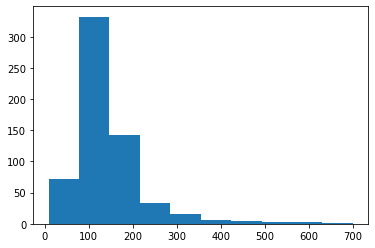

In [146]:
plt.hist(df['LoanAmount'])
plt.show()

In [313]:
#handling outliers of Loan Amount
# calculate summary statistics
mean = df['LoanAmount'].mean()
std = df['LoanAmount'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std/2
upper_bound = mean + std/2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df1 = df[(df['LoanAmount'] >= lower_bound)  & (df['LoanAmount'] <= upper_bound)]



Lower Bound : 104.39342832056388
Upper Bound : 188.43089600376038


In [314]:

upper_bound = 10000

# Drop the outliers
df2 = df1[(df1['ApplicantIncome'] <= upper_bound)]

In [315]:

upper_bound = 5000

# Drop the outliers
df3 = df2[(df2['CoapplicantIncome'] <= upper_bound)]

In [171]:
df3.shape

(329, 12)

In [316]:
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,Yes,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,Yes,Rural,N
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,Yes,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,Yes,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,No,Semiurban,N


In [317]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

## Data Transformation

### Split Features and Target Variable

In [318]:
########## Split Features and Target Varible ############
X = df3.drop(columns='Loan_Status')
y = df3['Loan_Status']


### Standardization

In [319]:
##### Standardization
import numpy as np
from sklearn.preprocessing import StandardScaler
scalers = []
for i,feature in enumerate(num_col):
    scalers.append(StandardScaler())
    df3[feature]= scalers[i].fit_transform(np.array(df3[feature]).reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [320]:
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.930492,-1.102262,0.359531,0.265916,Yes,Urban,Y
1,Male,Yes,1,Graduate,No,0.210448,0.035983,-0.447764,0.265916,Yes,Rural,N
3,Male,Yes,0,Not Graduate,No,-0.927063,0.677567,-0.798530,0.265916,Yes,Urban,Y
4,Male,No,0,Graduate,No,1.016375,-1.102262,0.122231,0.265916,Yes,Urban,Y
7,Male,Yes,3+,Graduate,No,-0.669416,0.787768,0.867609,0.265916,No,Semiurban,N


### Encoding categrical Features

In [326]:
#using Label encoder
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df3['Loan_Status'] = label_enc.fit_transform(df3['Loan_Status'])
df3.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.930492,-1.102262,0.359531,0.265916,Yes,Urban,1
1,Male,Yes,1,Graduate,No,0.210448,0.035983,-0.447764,0.265916,Yes,Rural,0
3,Male,Yes,0,Not Graduate,No,-0.927063,0.677567,-0.798530,0.265916,Yes,Urban,1
4,Male,No,0,Graduate,No,1.016375,-1.102262,0.122231,0.265916,Yes,Urban,1
7,Male,Yes,3+,Graduate,No,-0.669416,0.787768,0.867609,0.265916,No,Semiurban,0


In [327]:
#### Encoding categrical Features: ##########
df_encoded = pd.get_dummies(df3,drop_first=False)
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.930492,-1.102262,0.359531,0.265916,1,0,1,1,0,1,...,0,1,0,1,0,0,1,0,0,1
1,0.210448,0.035983,-0.447764,0.265916,0,0,1,0,1,0,...,0,1,0,1,0,0,1,1,0,0
3,-0.927063,0.677567,-0.798530,0.265916,1,0,1,0,1,1,...,0,0,1,1,0,0,1,0,0,1
4,1.016375,-1.102262,0.122231,0.265916,1,0,1,1,0,1,...,0,1,0,1,0,0,1,0,0,1
7,-0.669416,0.787768,0.867609,0.265916,0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,1,0


### Split Features and Target Variable

In [328]:
########## Split Features and Target Varible ############
X = df_encoded.drop(columns='Loan_Status')
y = df_encoded['Loan_Status']

### Splitting into Train -Test Data

In [329]:
################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [330]:
X_train.shape

(263, 21)

In [331]:
X_test.shape

(66, 21)

## Build Decision Tree Classifier


In [332]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

# buld decision tree classifier with default hyperparameters
tree_clf = DecisionTreeClassifier()



In [333]:
#Train the model
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

## Evaluate the Model

In [334]:
#Training Accuracy
#compute training accuracy
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))

Training Data Set Accuracy:  1.0


In [335]:
#F1 score
print("Training Data F1 Score ", f1_score(y_train,y_pred))

Training Data F1 Score  1.0


In [336]:
#testing accuracy

y_pred = tree_clf.predict(X_test)
print("Testing Data Set Accuracy: ", accuracy_score(y_test,y_pred))

Testing Data Set Accuracy:  0.7121212121212122


In [365]:
#compute the roc_auc score
roc_auc_score(y_test,y_pred)

0.8

In [337]:
#Validation Accuracy with cv = 5
print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Validation Mean F1 Score:  0.694262549408341
Validation Mean Accuracy:  0.752612481857765



[FR]

#### Probleme d' Overfitting 
Nous pouvons voir à partir des métriques ci-dessus que l'Accuracy du Training > Accuray du Testing avec les paramètres par défaut du classificateur d'arbre de décision. Par conséquent, le modèle est surajusté. Nous allons essayer quelques réglages d'hyper-paramètres et voir si cela aide.

#### Essayons d'abord de régler 'Max_Depth' de l'arbre

[EN]
#### Overfitting Problem
We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.

#### First let's try tuning 'Max_Depth' of tree


### Find the optimal max_depth for the Decision Tree Classifier

In [338]:
training_accuracy = []
testing_accuracy = []
val_accuracy = []
training_f1 = []
testing_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    #tree_clf.fit(X_train,y_train)
    tree_clf.fit(X,y)
    y_training_pred = tree_clf.predict(X_train)
    
    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    
    training_accuracy.append(training_acc)
    training_f1.append(train_f1)
    
    val_accuracy.append(val_mean_accuracy)
    val_f1.append(val_mean_f1)
    
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

#plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
#fig,ax = plt.subplots(figsize=(15,5))
#sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)


In [356]:
#print optimal max_depth
print("Optimal max_depth giving optimal validation F1 score= ",np.argmax(val_f1)+1)

max_depth =  3


In [344]:
val_f1

[0.7251060412938933,
 0.7213768387695102,
 0.7288532968792544,
 0.6950488745813176,
 0.694313367613186,
 0.6815977758360332,
 0.7007566900463658,
 0.6755024289838245,
 0.6645003610635918,
 0.6811764178789795,
 0.6933704166237189,
 0.6975516696671256,
 0.6834879990333775,
 0.6844248478120217,
 0.6850191807441972,
 0.6938923601028923,
 0.695308202837073,
 0.6999254123274711,
 0.6871075680399794]

From above, we can conclude that keeping 'Max_Depth' = ??? will yield optimum Training F1 score


#### Visulazing Decision Tree with Max Depth = 3

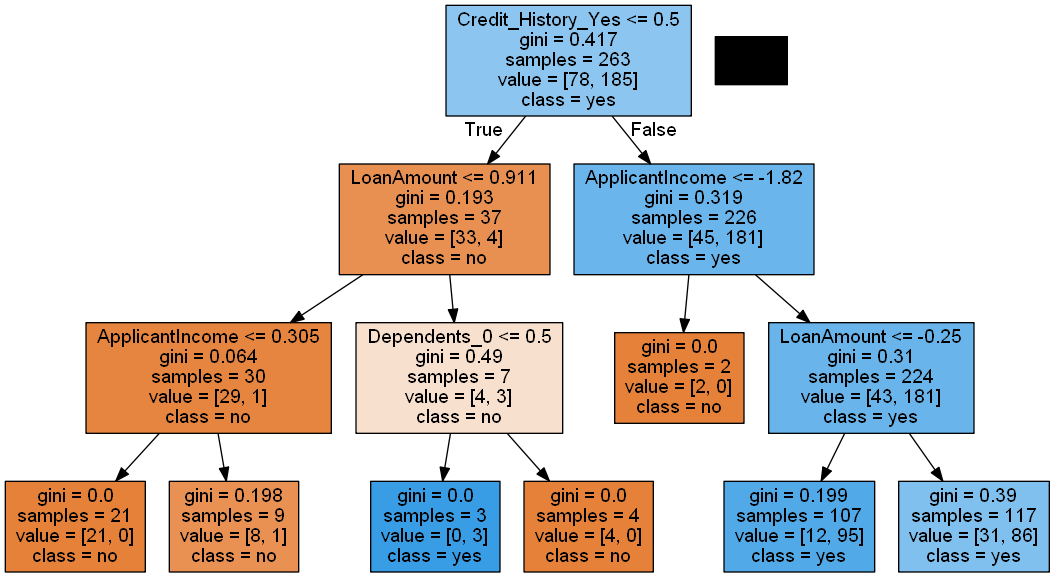

In [346]:
import pydotplus
from IPython.display import Image
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
data = tree.export_graphviz(tree_clf,feature_names=X.columns.tolist(), class_names=['no','yes'], out_file=None, filled=True)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

From above tree, we could see that some of the leafs have less than 5 samples hence our classifier might overfit.
We can sweep hyper-parameter 'min_samples_leaf' to further improve test accuracy by keeping max_depth to 3

Let's use this Decision Tree classifier on unseen test data and evaluate __Test Accuracy, F1 Score and Confusion Matrix__

In [347]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8787878787878788
Test F1 Score:  0.92
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,12,8,20
1,0,46,46
All,12,54,66


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


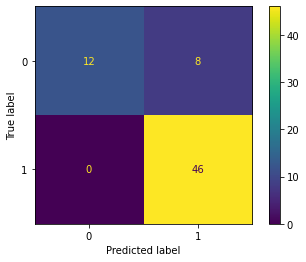

In [350]:
from sklearn import metrics
metrics.plot_confusion_matrix(tree_clf, X_test, y_test)#, display_labels = ['No','Yes'])



####  Observations sur les erreurs de classifications


[FR]

On peut voir que la majorité des erreurs de classification se produisent parce que les candidats au rejet de prêt sont classés comme acceptés.

[EN]

It can be seen that majority of the misclassifications are happening because of Loan Reject applicants being classified as Accept.


